In [13]:
import os

import matplotlib.pyplot as plt
import numpy as np

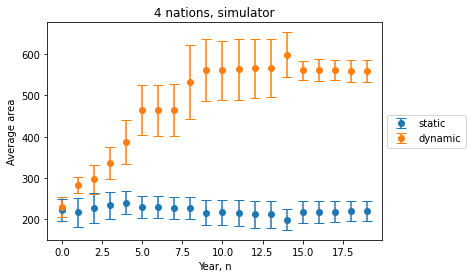

In [62]:
dynamic_areas = {}
static_areas = {}


runs = [(4, 'simulator', True, 20)]

for num_civs,backend,is_static,years in runs:
    
    samples = []
    folders = [info for info in os.fwalk('data')][0][1]
    for folder in folders:
        (n,b,s,t) = folder.split('_')
        if n==str(num_civs) and b==backend and (s!=None)==is_static:
            samples.append(folder)
    num_samples = len(samples)
                
    dynamic_areas[num_civs,backend] = [[] for year in range(years)]
    static_areas[num_civs,backend] = [[] for year in range(years)]
    for sample in samples:
        with open('data/'+sample+'/data.txt', 'r') as file:
            data = file.readlines()

            opponent = eval(data[-1])['static']
            for year, dump in enumerate(data):
                if year<years:
                    dump = eval(dump)
                    area = dump['area']
                    opponent = dump['static']

                    for civ in area:
                        if civ in opponent:
                            static_areas[num_civs,backend][year].append(area[civ])
                        else:
                            dynamic_areas[num_civs,backend][year].append(area[civ])
                
for num_civs,backend,opponent,years in runs:
    ax = plt.gca()
    plt.title(str(num_civs) + ' nations, ' +backend)
    plt.xlabel('Year, n')
    plt.ylabel('Average area')
    
    y_static = [np.mean(static_areas[num_civs,backend][year]) for year in range(years)]
    yerr_static = [np.std(static_areas[num_civs,backend][year])/2 for year in range(years)]
    y_dynamic = [np.mean(dynamic_areas[num_civs,backend][year]) for year in range(years)]
    yerr_dynamic = [np.std(dynamic_areas[num_civs,backend][year])/2 for year in range(years)]
    
    ax.errorbar( range(years), y_static, yerr=yerr_static, label='static', fmt='o', capsize=5)
    ax.errorbar( range(years), y_dynamic, yerr=yerr_dynamic, label='dynamic', fmt='o', capsize=5)
    plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
    plt.show()